# SpatialMouse revision - Answer query 4

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
## Import the custom library
import os
import sys

# add xDbit toolbox path to path variable
module_path = os.path.abspath("../../")
if module_path not in sys.path:
    sys.path.append(module_path)

import xdbit_funcs as db

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path
import seaborn as sns
import gc
import anndata

In [4]:
plt.rcParams['figure.dpi'] = 100
plt.style.use('default')

# Load data

In [5]:
samples = {
    "Kidney": "37_46_B3", 
    "Liver": "37_38_B2"
          }

adatas = {}
for organ, group in samples.items():
    file = "out/{}_adata_pp_wohires.h5ad".format(organ)
    ad = sc.read(file)
    
    # extract one sample for this organ
    ad = db.tl.extract_groups(ad, groupby="id", groups=group)
    
    # add to dict
    adatas[organ] = ad

In [6]:
adatas

{'Kidney': AnnData object with n_obs × n_vars = 1116 × 15027
     obs: 'array_row', 'array_col', 'um_row', 'um_col', 'id', 'pixel_row', 'pixel_col', 'dapi_mean', 'dapi_mean_norm', 'experiment_id', 'organism', 'age', 'organ', 'age_months', 'mouse_id', 'exp_date', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CT010467.1_pct', 'leiden_uncorrected', 'leiden'
     var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
     uns: 'experiment_id_colors', 'hvg', 'id_colors', 'leiden', 'leiden_colors', 'log1p', 'matchedVis', 'neighbors', 'neighbors_uncorrected', 'organ_colors', 'pca', 'registered', 'spatial', 'tsne', 'umap'
     obsm: 'X_emb', 'X_pca', 'X_scanorama', 'X_tsne', 'X_umap', 'spatial'
     varm: 'PCs'
     layers: 'counts', 'norm_counts'
     obsp: 'connectivities', 'distances', 'neighbors_uncorrected_co

## Plots for revision

Reviewer 1 asked to discuss the stripe effects that are seen in some of the spatial plots.

Saving figure to file figures/stripe_effect/spatial-Kidney-counts_raw.pdf
Saved.


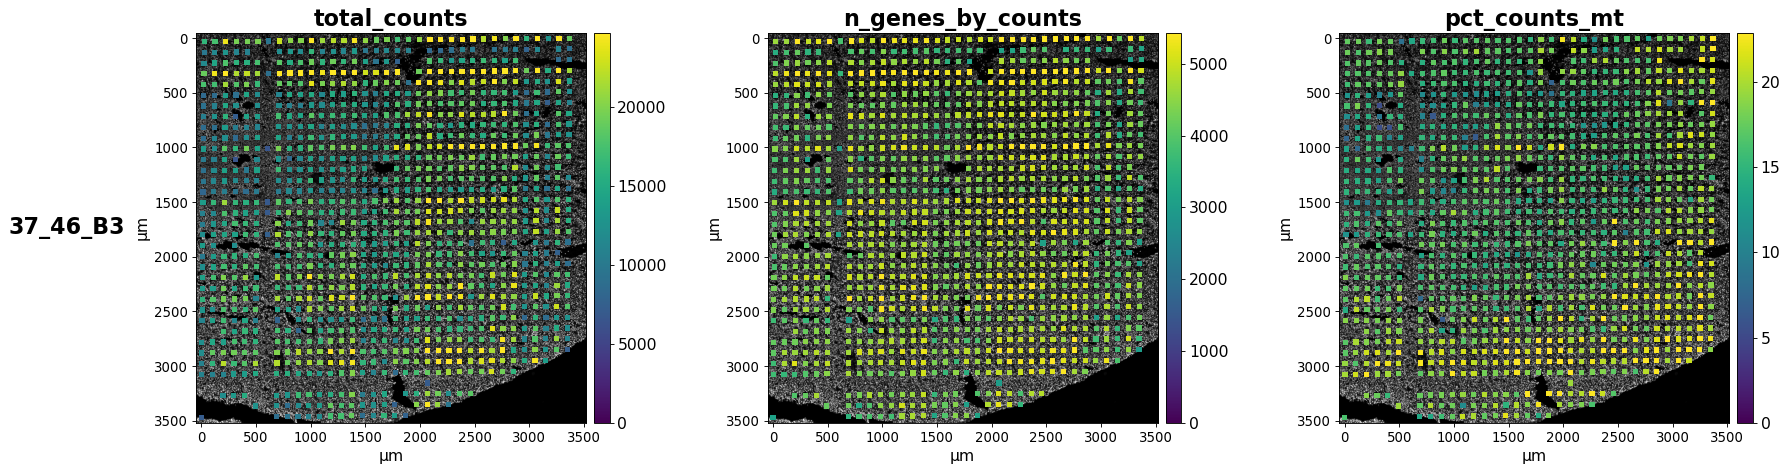

Saving figure to file figures/stripe_effect/spatial-Liver-counts_raw.pdf
Saved.


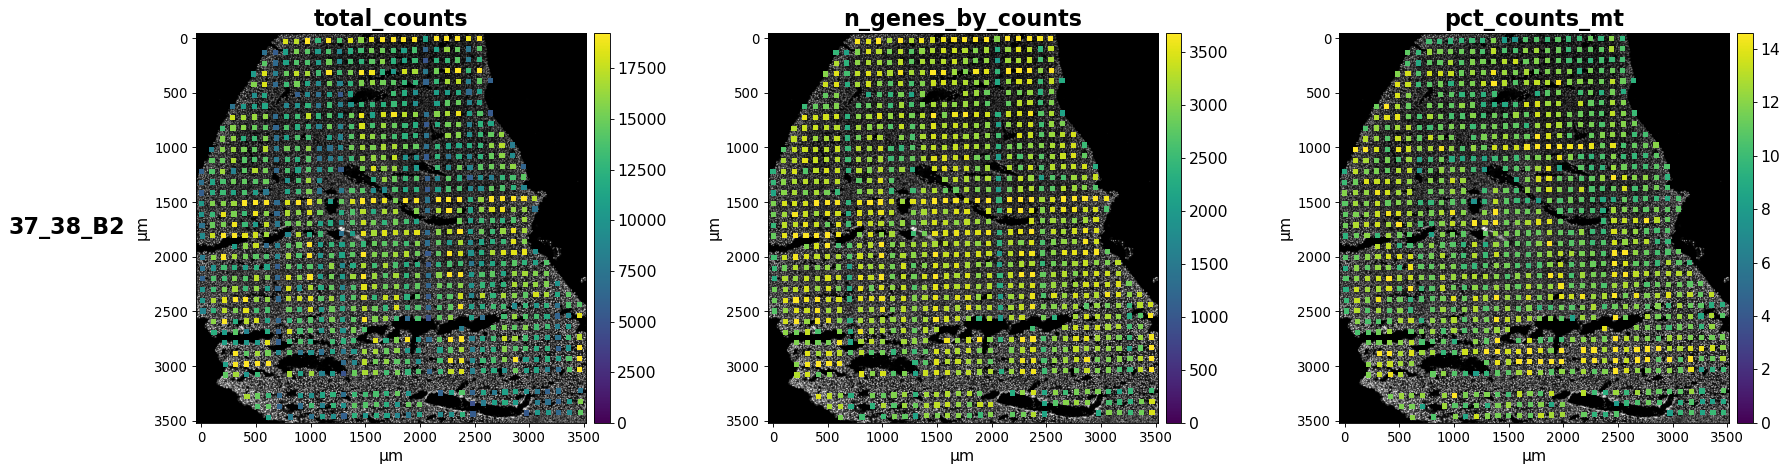

In [7]:
for organ, adata in adatas.items():
    db.pl.spatial(adata, keys=['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], 
                  groupby="id",
                  image_key='dapi',
                  savepath="figures/stripe_effect/spatial-{}-counts_raw.pdf".format(organ)             
                 )

Saving figure to file figures/stripe_effect/spatial-Kidney-Actb_norm.pdf
Saved.


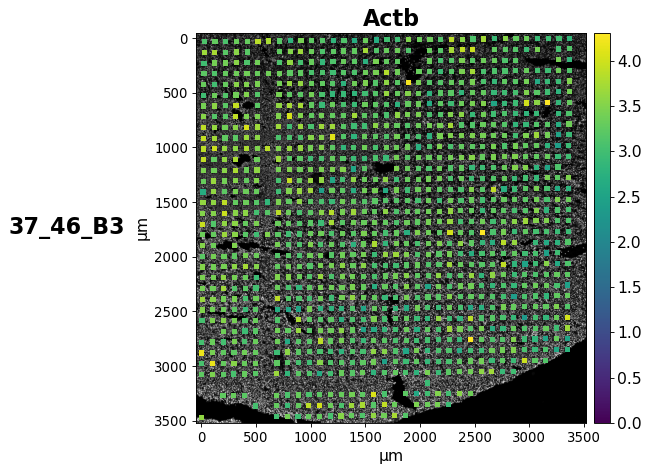

Saving figure to file figures/stripe_effect/spatial-Liver-Actb_norm.pdf
Saved.


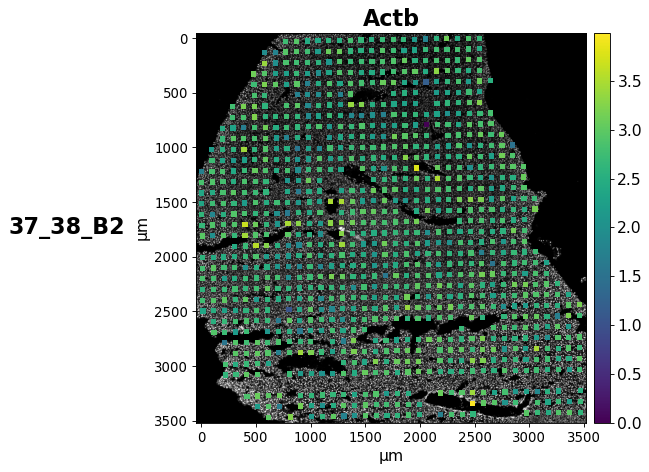

In [8]:
for organ, adata in adatas.items():
    db.pl.spatial(adata, keys=['Actb'], 
                  groupby="id",
                  image_key='dapi',
                  savepath="figures/stripe_effect/spatial-{}-Actb_norm.pdf".format(organ)             
                 )

Saving figure to file figures/stripe_effect/spatial-Kidney-Actb_raw.pdf
Saved.


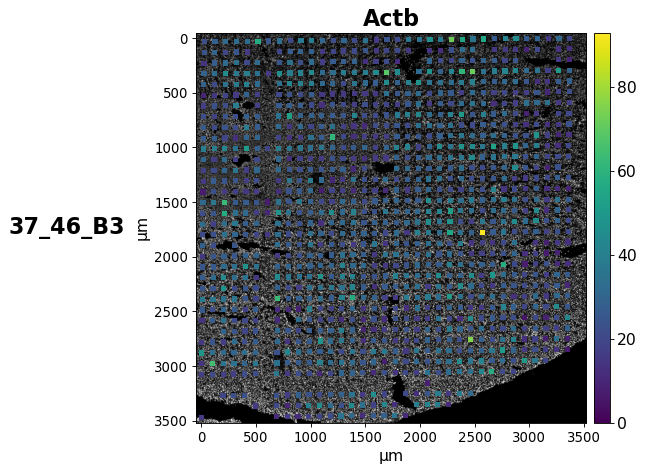

Saving figure to file figures/stripe_effect/spatial-Liver-Actb_raw.pdf
Saved.


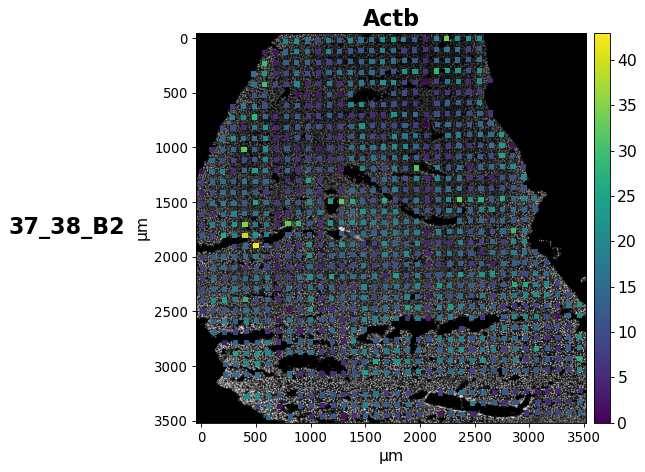

In [9]:
for organ, adata in adatas.items():
    db.pl.spatial(adata, keys=['Actb'], layer="counts",
                  groupby="id",
                  image_key='dapi',
                  savepath="figures/stripe_effect/spatial-{}-Actb_raw.pdf".format(organ)             
                 )